<a href="https://colab.research.google.com/github/hanucherukuri/Loan_Prediction/blob/main/Loan_Prediction_Tpot__Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Acquisition

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train_path="/content/drive/MyDrive/Practice Problems/Loan Prediction/train_ctrUa4K.csv"
test_path="/content/drive/MyDrive/Practice Problems/Loan Prediction/test_lAUu6dG.csv"

In [ ]:
train=pd.read_csv(train_path)
test=pd.read_csv(test_path)
train.shape, test.shape

((614, 13), (367, 12))

In [ ]:
train["from"]="train"
test["from"]="test"

In [ ]:
train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,from
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,train


In [ ]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,from
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,test
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,test
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,test
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,test
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,test


In [ ]:
df=pd.concat([train, test])

In [ ]:
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,from
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,train


In [ ]:
df.drop('Loan_Status',axis=1,inplace=True)

# Data wrangling

In [ ]:
df.isna().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
from                  0
dtype: int64

In [ ]:
df.apply(lambda x: len(x.unique()))

Loan_ID              981
Gender                 3
Married                3
Dependents             5
Education              2
Self_Employed          3
ApplicantIncome      752
CoapplicantIncome    437
LoanAmount           233
Loan_Amount_Term      13
Credit_History         3
Property_Area          3
from                   2
dtype: int64

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [ ]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [ ]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
from                 0
dtype: int64

# Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

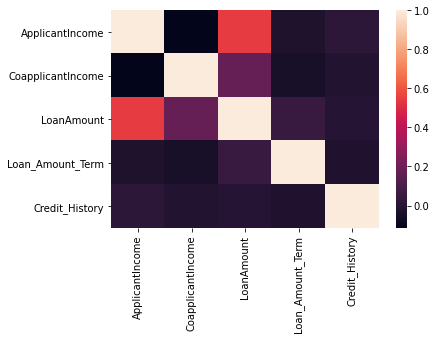

In [ ]:
sns.heatmap(df.corr())

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


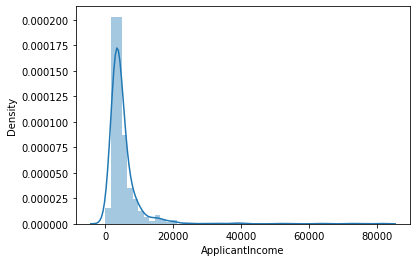

In [ ]:
sns.distplot(df.ApplicantIncome)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


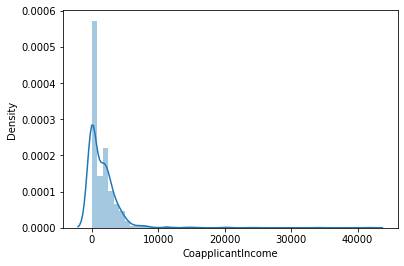

In [ ]:
sns.distplot(df.CoapplicantIncome)

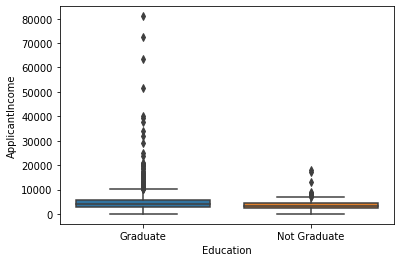

In [ ]:
sns.boxplot(x="Education", y="ApplicantIncome", data=df)

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'from'],
      dtype='object')

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,from
0,LP001002,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,train


# Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
category=['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area']
le=LabelEncoder()
for i in category:
  df[i]=le.fit_transform(df[i])


In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,from
0,LP001002,1,0,0,0,0,5849,0.0,126.0,360.0,1.0,2,train
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,train
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,train
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,train
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,train


In [ ]:
train_data=df.loc[df["from"]=="train"]
test_data=df.loc[df["from"]=="test"]

In [ ]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,from
0,LP001002,1,0,0,0,0,5849,0.0,126.0,360.0,1.0,2,train
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,train
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,train
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,train
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,train


In [ ]:
train_data.drop(["Loan_ID", "from"], axis="columns", inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,from
0,LP001015,1,1,0,0,0,5720,0.0,110.0,360.0,1.0,2,test
1,LP001022,1,1,1,0,0,3076,1500.0,126.0,360.0,1.0,2,test
2,LP001031,1,1,2,0,0,5000,1800.0,208.0,360.0,1.0,2,test
3,LP001035,1,1,2,0,0,2340,2546.0,100.0,360.0,1.0,2,test
4,LP001051,1,0,0,1,0,3276,0.0,78.0,360.0,1.0,2,test


In [ ]:
test_data.drop(["Loan_ID", "from"], axis="columns", inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0.0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500.0,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800.0,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546.0,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0.0,78.0,360.0,1.0,2


In [ ]:
x_data=train_data
y_data=train.Loan_Status

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_data=le.fit_transform(y_data)

In [ ]:
x_data.shape ,y_data.shape

((614, 11), (614,))

#Tpot Classifier

In [ ]:
# Install tpot on the server
!pip install tpot

     |████████████████████████████████| 92kB 3.8MB/s 
     |████████████████████████████████| 163kB 14.6MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11956 sha256=3463f326589e818268564624fdd677e0845d44430cb90d261d5d212eb094a7d4
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit


In [ ]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.75, test_size=0.25, random_state=42)
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)


Generation 1 - Current best internal CV score: 0.8217391304347826

Generation 2 - Current best internal CV score: 0.8217391304347826

Generation 3 - Current best internal CV score: 0.8217391304347826

Generation 4 - Current best internal CV score: 0.8217391304347826

Generation 5 - Current best internal CV score: 0.8217391304347826

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.35000000000000003, min_samples_leaf=18, min_samples_split=9, n_estimators=100)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=5,
               log_file=None, max_eval_time_mins=5, max_time_mins=None,
               memory=None, mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=50,
               random_state=42, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)